In [14]:
import os, shutil #复制文件
# 原始目录所在的路径
# 数据集未压缩
original_dataset_dir0 = 'C:/Users/86187/Desktop/df/mask/have_mask'
original_dataset_dir1 = 'C:/Users/86187/Desktop/df/mask/no_mask'

# 我们将在其中的目录存储较小的数据集
base_dir = 'C:/Users/86187/Desktop/df/fa'
os.mkdir(base_dir)

# # 训练、验证、测试数据集的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 戴口罩训练图片所在目录
train_mask_dir = os.path.join(train_dir, 'mask')
os.mkdir(train_mask_dir)

# 不戴口罩训练图片所在目录
train_unmask_dir = os.path.join(train_dir, 'unmask')
os.mkdir(train_unmask_dir)

# 戴口罩验证图片所在目录
validation_mask_dir = os.path.join(validation_dir, 'mask')
os.mkdir(validation_mask_dir)

# 不戴口罩验证数据集所在目录
validation_unmask_dir = os.path.join(validation_dir, 'unmask')
os.mkdir(validation_unmask_dir)

# 戴口罩测试数据集所在目录
test_mask_dir = os.path.join(test_dir, 'mask')
os.mkdir(test_mask_dir)

# 不戴口罩测试数据集所在目录
test_unmask_dir = os.path.join(test_dir, 'unmask')
os.mkdir(test_unmask_dir)

# 将前600张戴口罩图像复制到train_mask_dir
fnames = ['{}.jpg'.format(i) for i in range(600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir0, fname)
    dst = os.path.join(train_mask_dir, fname)
    shutil.copyfile(src, dst)

# 将600张戴口罩图像复制到validation_mask_dir
fnames = ['{}.jpg'.format(i) for i in range(600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir0, fname)
    dst = os.path.join(validation_mask_dir, fname)
    shutil.copyfile(src, dst)
    
# 将600张戴口罩图像复制到test_mask_dir
fnames = ['{}.jpg'.format(i) for i in range(600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir0, fname)
    dst = os.path.join(test_mask_dir, fname)
    shutil.copyfile(src, dst)
    
# 将前1000张不戴口罩图像复制到train_unmask_dir
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(train_unmask_dir, fname)
    shutil.copyfile(src, dst)
    
# 将500张不戴口罩图像复制到validation_unmask_dir
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(validation_unmask_dir, fname)
    shutil.copyfile(src, dst)
    
# 将500张不戴口罩图像复制到test_unmask_dir
fnames = ['{}.jpg'.format(i) for i in range(1200, 1700)]
for fname in fnames:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(test_unmask_dir, fname)
    shutil.copyfile(src, dst)


In [15]:
print('total training mask images:', len(os.listdir(train_mask_dir)))
print('total training unmask images:', len(os.listdir(train_unmask_dir)))
print('total validation maskt images:', len(os.listdir(validation_mask_dir)))
print('total validation unmask images:', len(os.listdir(validation_unmask_dir)))
print('total test mask images:', len(os.listdir(test_mask_dir)))
print('total test unmask images:', len(os.listdir(test_unmask_dir)))


total training mask images: 600
total training unmask images: 1000
total validation maskt images: 600
total validation unmask images: 500
total test mask images: 600
total test unmask images: 500


In [26]:
import tensorflow as tf  
from tensorflow.keras import layers  
from tensorflow.keras import models  

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [29]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.


In [32]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
Epoch 1/30


C:\Users\86187\.conda\envs\pytorch\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 20.0000 - loss: 0.3056 - acc: 0.8685

C:\Users\86187\.conda\envs\pytorch\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


100/100 [==============================] - 38s 379ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.3056 - acc: 0.8685 - val_loss: 0.1862 - val_acc: 0.9320
Epoch 2/30
100/100 [==============================] - 31s 309ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1457 - acc: 0.9500 - val_loss: 0.1619 - val_acc: 0.9360
Epoch 3/30
100/100 [==============================] - 31s 307ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1293 - acc: 0.9575 - val_loss: 0.1259 - val_acc: 0.9580
Epoch 4/30
100/100 [==============================] - 31s 310ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1249 - acc: 0.9550 - val_loss: 0.1301 - val_acc: 0.9520
Epoch 5/30
100/100 [==============================] - 30s 301ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.0925 - acc: 0.9715 - val_loss: 0.1039 - val_acc: 0.9660
Epoch 6/30
100/100 [==============================] - 30s 305ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.0908 - acc: 0.9685 - val_loss: 0.0904 - val_acc: 0.9690
Epo

In [33]:
model.save('mask_and_unmask_small_1.h5')

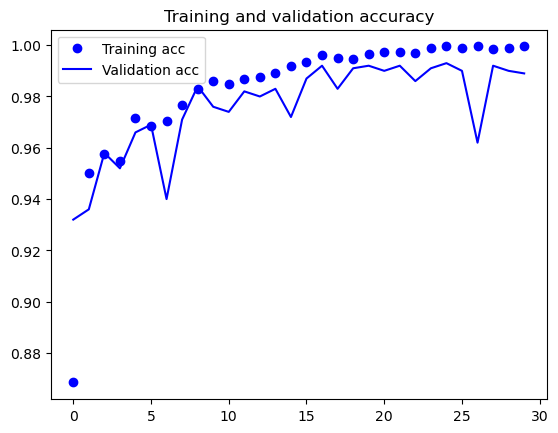

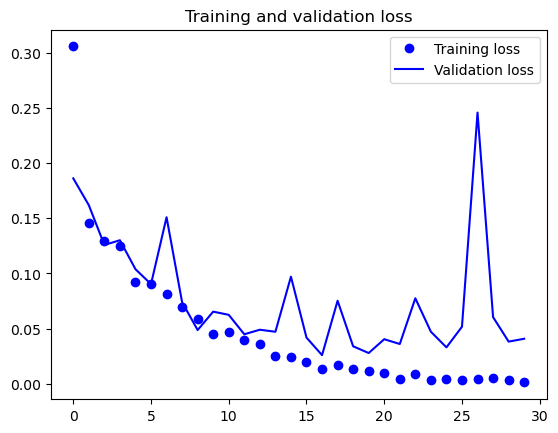

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 1600 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.
Epoch 1/100


C:\Users\86187\.conda\envs\pytorch\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.5486 - acc: 0.7206

C:\Users\86187\.conda\envs\pytorch\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


100/100 [==============================] - 50s 493ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.5486 - acc: 0.7206 - val_loss: 0.2837 - val_acc: 0.8823
Epoch 2/100
100/100 [==============================] - 47s 470ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.3619 - acc: 0.8431 - val_loss: 0.2031 - val_acc: 0.9209
Epoch 3/100
100/100 [==============================] - 47s 468ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.3056 - acc: 0.8772 - val_loss: 0.1577 - val_acc: 0.9399
Epoch 4/100
100/100 [==============================] - 47s 471ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.2866 - acc: 0.8884 - val_loss: 0.1472 - val_acc: 0.9386
Epoch 5/100
100/100 [==============================] - 48s 483ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.2690 - acc: 0.8963 - val_loss: 0.1346 - val_acc: 0.9481
Epoch 6/100
100/100 [==============================] - 48s 484ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.2482 - acc: 0.9016 - val_loss: 0.1079 - val_acc: 0.963

100/100 [==============================] - 48s 477ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.0393 - acc: 0.9862 - val_loss: 0.0507 - val_acc: 0.9861
Epoch 98/100
100/100 [==============================] - 47s 471ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.0338 - acc: 0.9894 - val_loss: 0.0076 - val_acc: 0.9975
Epoch 99/100
100/100 [==============================] - 48s 483ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.0243 - acc: 0.9891 - val_loss: 0.0048 - val_acc: 0.9994
Epoch 100/100
100/100 [==============================] - 48s 476ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.0376 - acc: 0.9872 - val_loss: 0.0038 - val_acc: 0.9987


In [38]:
model.save('mask_and_unmask_small_2.h5')

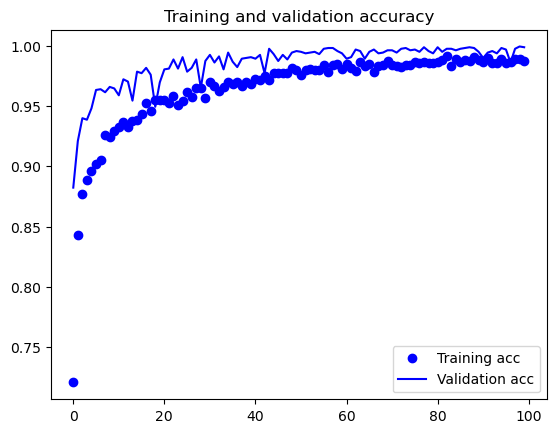

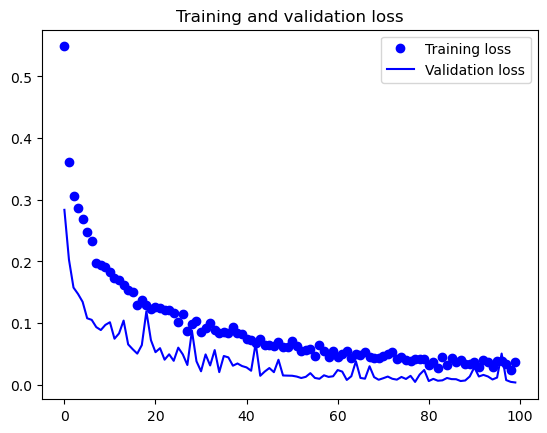

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()